In [ ]:
Name - Veid Krishna Mishra
LGMVIP DATA SCIENCE INTERN
Stock Market Prediction Using Stacked LSTM

***Import Libraries***


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plot

***LOAD DATASET NSE TATA GLOBAL***

In [3]:
df=pd.read_csv("NSE-TATAGLOBAL.csv")

***DATASET PREVIEW***

In [26]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [4]:
df.head()
#PREVIEW OF DATASET(TOP 5 ROWS)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,9/28/2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,9/27/2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,9/26/2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,9/25/2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,9/24/2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.tail()
#BOTTOM 5 ROWS OF DATASET

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,7/27/2010,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,7/26/2010,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,7/23/2010,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,7/22/2010,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,7/21/2010,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
## CONVERSION OF DATE COLUMN OF DATASET from string type to date-time format
df['Date']=pd.to_datetime(df['Date']);
print(type(df.Date[0]));

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


*SORTING THE DATASET BY DATE*

In [7]:
df1=df.sort_values(by='Date')
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


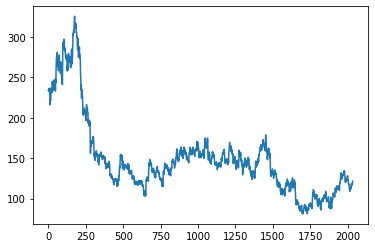

In [8]:
plot.plot(df1['Close'])

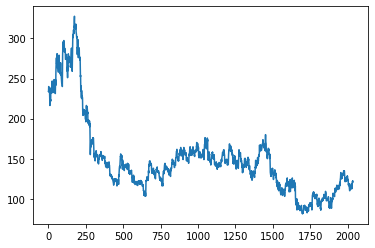

In [9]:
plot.plot(df1['Open'])
df2=df1['Close']

***Preparing Data for analysis***

In [10]:
#Normalizing the data values to [0,1] for Logistic regression  
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
df2


array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

***SPLITTING DATA INTO TEST AND TRAIN***

In [27]:
train_size=int(len(df2) * 0.75)
test_size=int(len(df2) - train_size)
train_data,test_data=df2[0:train_size:1],df2[train_size:len(df2):1]

In [28]:
#size of test and train data (rows)
train_size,test_size


(1526, 509)

In [29]:
# CREATING DATASET MATRIX FROM ARRAY VALUES

def createdataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset) - time_step - 1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX) , np.array(dataY)

In [30]:
time_step=50
X_train,Y_train=createdataset(train_data,time_step)
X_test,Y_test=createdataset(test_data,time_step)

print(X_train)
print(Y_train)

[[0.16584967 0.16319444 0.1621732  ... 0.17422386 0.17116013 0.16564542]
 [0.16319444 0.1621732  0.14971405 ... 0.17116013 0.16564542 0.16033497]
 [0.1621732  0.14971405 0.15400327 ... 0.16564542 0.16033497 0.17381536]
 ...
 [0.1870915  0.17687908 0.18382353 ... 0.24223856 0.24571078 0.24775327]
 [0.17687908 0.18382353 0.19158497 ... 0.24571078 0.24775327 0.24836601]
 [0.18382353 0.19158497 0.19914216 ... 0.24775327 0.24836601 0.25020425]]
[0.16033497 0.17381536 0.17851307 ... 0.24836601 0.25020425 0.25020425]


In [31]:
print(X_train.shape), print(Y_train.shape)


(1475, 50)
(1475,)


(None, None)

In [32]:
print(X_test.shape), print(Y_test.shape)

(458, 50)
(458,)


(None, None)

In [33]:
# reshape the input to sample, timestep and features which are vital for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


***MODEL BUILDING LSTM***

In [34]:
#Create the stacked LSTM MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error" ,optimizer='adam')
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,Y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)


Epoch 1/60
21/21 [==============================] - 9s 159ms/step - loss: 0.0070 - val_loss: 0.0031
Epoch 2/60
21/21 [==============================] - 2s 97ms/step - loss: 0.0016 - val_loss: 7.4885e-04
Epoch 3/60
21/21 [==============================] - 2s 96ms/step - loss: 8.6352e-04 - val_loss: 6.9759e-04
Epoch 4/60
21/21 [==============================] - 2s 96ms/step - loss: 8.3653e-04 - val_loss: 6.2760e-04
Epoch 5/60
21/21 [==============================] - 2s 96ms/step - loss: 7.9254e-04 - val_loss: 6.0551e-04
Epoch 6/60
21/21 [==============================] - 2s 94ms/step - loss: 7.6692e-04 - val_loss: 5.5907e-04
Epoch 7/60
21/21 [==============================] - 2s 95ms/step - loss: 7.6157e-04 - val_loss: 5.2169e-04
Epoch 8/60
21/21 [==============================] - 2s 95ms/step - loss: 7.4877e-04 - val_loss: 4.8186e-04
Epoch 9/60
21/21 [==============================] - 2s 95ms/step - loss: 6.8822e-04 - val_loss: 4.8435e-04
Epoch 10/60
21/21 [=============================

**Prediction**

In [37]:
test_predict=model.predict(X_test)


In [38]:
test_predict2=scaler.inverse_transform(test_predict)


In [39]:
test_predict2

array([[116.287964],
       [117.07509 ],
       [119.235695],
       [121.23053 ],
       [123.085396],
       [122.95501 ],
       [122.048004],
       [122.40656 ],
       [122.85696 ],
       [122.557   ],
       [123.00511 ],
       [123.527214],
       [123.54026 ],
       [123.41245 ],
       [123.01807 ],
       [123.62416 ],
       [124.150406],
       [124.36408 ],
       [122.79532 ],
       [121.68506 ],
       [120.18971 ],
       [119.078606],
       [117.76684 ],
       [118.82222 ],
       [119.63657 ],
       [120.676384],
       [121.694244],
       [122.915565],
       [123.97638 ],
       [124.380104],
       [124.70969 ],
       [124.53738 ],
       [124.3437  ],
       [124.109276],
       [125.63111 ],
       [125.66407 ],
       [126.93198 ],
       [127.561935],
       [127.6203  ],
       [128.04562 ],
       [129.34906 ],
       [127.955284],
       [127.35206 ],
       [127.63632 ],
       [127.974236],
       [128.62848 ],
       [129.72113 ],
       [129.4

In [42]:
import math
from sklearn.metrics import mean_squared_error
print("error in prediction is calculated out to be")
math.sqrt(mean_squared_error(Y_test,test_predict) ) 

error in prediction is calculated out to be


0.033363623763192955